In [12]:
# EDA packages
import pandas as pd
import numpy as np

In [13]:
# ML Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# Load our data
df = pd.read_csv('/content/Gender_Detection.csv',header= 0,encoding= 'unicode_escape')
df

,Name,Gender
0,James,M
1,John,M
2,Robert,M
3,Michael,M
4,William,M
...,...,...
147264,Zylenn,M
147265,Zymeon,M
147266,Zyndel,M
147267,Zyshan,M


In [15]:
df.head()

,Name,Gender
0,James,M
1,John,M
2,Robert,M
3,Michael,M
4,William,M


In [16]:
df.size

294538

In [17]:
# Data Cleaning
# Checking for column name consistency
df.columns

Index(['Name', 'Gender'], dtype='object')

In [11]:
df.dtypes

Name      object
Gender    object
dtype: object

In [18]:
# Data Types
df.dtypes

Name      object
Gender    object
dtype: object

In [19]:
# Checking for Missing Values
df.isnull().isnull().sum()

Name      0
Gender    0
dtype: int64

In [21]:
# Number of Female Names
df[df.Gender == 'F'].size

179498

In [22]:
# Number of Male Names
df[df.Gender == 'M'].size

115040

In [59]:
df['Gender'].value_counts()

0    89749
1    57520
Name: Gender, dtype: int64

<Axes: >

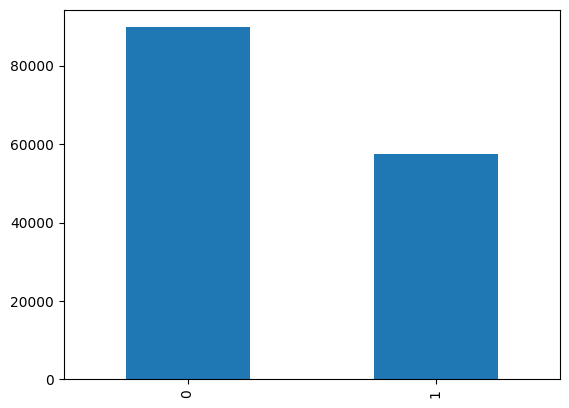

In [60]:
df['Gender'].value_counts().plot(kind='bar')

In [23]:
df_names = df

In [24]:
# Replacing All F and M with 0 and 1 respectively
df_names.Gender.replace({'F':0,'M':1},inplace=True)

In [26]:
df_names.Gender.unique()

array([1, 0])

In [27]:
df_names.dtypes

Name      object
Gender     int64
dtype: object

In [29]:
Xfeatures =df_names['Name']

In [38]:
# Feature Extraction
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [39]:
cv.get_feature_names_out()

array(['1957975', 'aaban', 'aabha', ..., 'zyyon', 'zzyzx', 'zzziekal'],
      dtype=object)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Features
X
# Labels
y = df_names.Gender

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5681598386798082

In [44]:
# Accuracy of our Model
print("Accuracy of Model",clf.score(X_test,y_test)*100,"%")

Accuracy of Model 56.815983867980826 %


In [45]:
# Accuracy of our Model
print("Accuracy of Model",clf.score(X_train,y_train)*100,"%")

Accuracy of Model 93.39110165197123 %


In [46]:
# Sample1 Prediction
sample_name = ["Mary"]
vect = cv.transform(sample_name).toarray()

In [47]:
vect

array([[0, 0, 0, ..., 0, 0, 0]])

In [48]:
# Female is 0, Male is 1
clf.predict(vect)

array([0])

In [49]:
# Sample2 Prediction
sample_name1 = ["Mark"]
vect1 = cv.transform(sample_name1).toarray()

In [50]:
clf.predict(vect1)

array([1])

In [51]:
# Sample3 Prediction of Russian Names
sample_name2 = ["Natasha"]
vect2 = cv.transform(sample_name2).toarray()

In [52]:

clf.predict(vect2)

array([0])

In [53]:
# Sample3 Prediction of Random Names
sample_name3 = ["Nefertiti","Nasha","Ama","Ayo","Xhavier","Ovetta","Tathiana","Xia","Joseph","Xianliang"]
vect3 = cv.transform(sample_name3).toarray()

In [54]:
clf.predict(vect3)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [55]:
# A function to do it
def genderpredictor(a):
    test_name = [a]
    vector = cv.transform(test_name).toarray()
    if clf.predict(vector) == 0:
        print("Female")
    else:
        print("Male")

In [56]:
genderpredictor("Martha")

Female


In [58]:
namelist = ["Yaa","Yaw","Femi","Masha"]
for i in namelist:
    print(genderpredictor(i))

Female
None
Male
None
Female
None
Female
None
